In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [10]:
data = pd.read_csv('/content/NSE-TATAGLOBAL.csv')

# Display the first few rows
print(data.head())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB
None


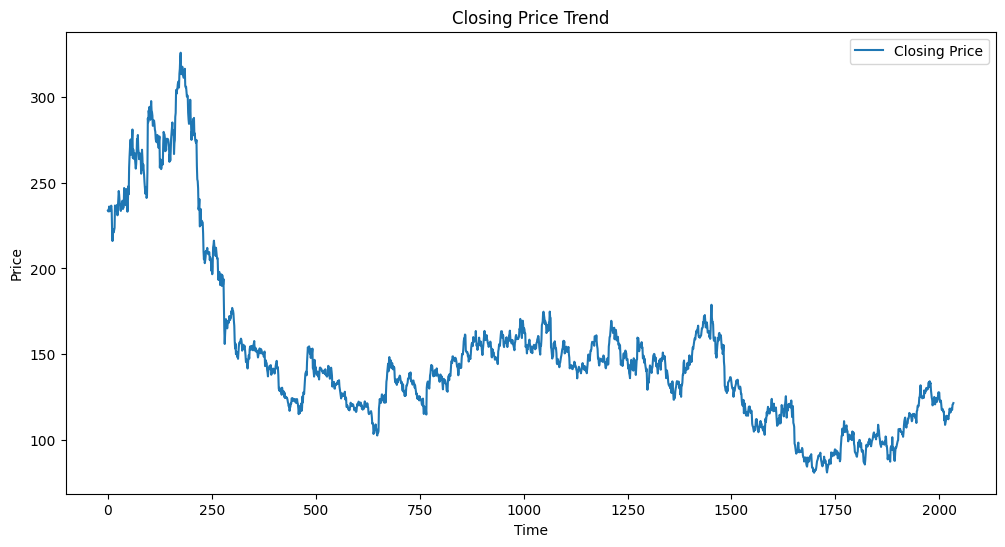

In [20]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 6))

# Plot the 'Close' column to visualize the closing prices over time
# Add a label to identify this line on the plot
plt.plot(data['Close'], label='Closing Price')

# Display the legend to show the label for the plotted line
plt.legend()

# Add a title to the plot for context
plt.title("Closing Price Trend")

# Add labels to the x and y axes for clarity
plt.xlabel("Time")
plt.ylabel("Price")

# Display the plot
plt.show()

Classification Problem, Buy +1 or Sell -1

In [19]:
# Calculate the difference between the 'Open' and 'Close' prices for each day
# and store the result in a new column called 'Open-Close'
data['Open-Close'] = data['Open'] - data['Close']

# Calculate the difference between the 'High' and 'Low' prices for each day
# and store the result in a new column called 'High-Low'
data['High-Low'] = data['High'] - data['Low']

# Remove any rows with missing (NaN) values to ensure clean data for analysis
data = data.dropna()

INPUT FEATURES TO PREDICT WHETHER CUSTOMER SHOULD SELL OR BUY.


In [28]:
X =  data[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
0,0.30,5.75
1,1.30,5.70
2,5.75,7.50
3,-2.80,4.75
4,0.25,8.45


In [24]:
# Define the target variable 'Y'
# This assigns a value of 1 if the next day's closing price ('Close'.shift(-1))
# is higher than the current day's closing price ('Close'), indicating a potential price increase.
# Otherwise, it assigns -1, indicating a potential price decrease.
Y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [25]:
Y

array([-1,  1,  1, ...,  1,  1, -1])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

Implementation of KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # Changed 'sklearn.metrices' to 'sklearn.metrics'

#using gridesearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

#fit the mdoel
model.fit(X_train, Y_train)

#Accuray Score
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train Data Accuracy: %.2f' % (accuracy_train))
print ('Test Data Accuracy: %.2f' % (accuracy_test))

Train Data Accuracy: 0.87
Test Data Accuracy: 0.88


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [38]:
# Use the trained model to make predictions on the test data (X_test)
# The model outputs the predicted class labels for each data point in X_test
prediction_classification = model.predict(X_test)

In [41]:
# Create a DataFrame to compare actual and predicted classes
# 'Actual Class' contains the true labels from the test set (Y_test)
# 'Predicted Class' contains the predicted labels from the model (prediction_classification)
actual_predicted_data = pd.DataFrame({
    'Actual Class': Y_test,
    'Predicted Class': prediction_classification
})

In [42]:
# Display the first few rows of the DataFrame for inspection
print(actual_predicted_data.head())

   Actual Class  Predicted Class
0             1                1
1             1                1
2             1                1
3             1                1
4             1               -1


Regression Problem using **KNN**

In [43]:
Y=data['Close']

In [44]:
Y

,Close
0,233.75
1,233.25
2,234.25
3,236.10
4,233.30
...,...
2030,118.65
2031,117.60
2032,120.65
2033,120.90


Implementation of **KNN**

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X,Y,train_size=.25, random_state=44)

#using gridesearch to find the best parameneters
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=KNeighborsRegressor() # neighbors is not defined, use KNeighborsRegressor
model_reg=GridSearchCV(knn_reg,params,cv=5) #knn is not defined, it should be knn_reg

#fit the model
model_reg.fit(X_train_reg,Y_train_reg)
prediction=model_reg.predict(X_test_reg)

In [51]:
print(prediuction)

[154.19       128.17       194.45666667 ... 145.34       164.
 135.66666667]


In [56]:
# Calculate the Root Mean Squared Error (RMSE) for regression predictions
# 'Y_test_reg' contains the actual values from the test set (regression target variable)
# 'prediction' contains the predicted values from the model

# First, calculate the squared differences between the actual and predicted values
# Then, compute the mean of those squared differences, and finally take the square root
rms = np.sqrt(np.mean(np.power((np.array(Y_test_reg) - np.array(prediction)), 2)))

# Print the RMSE value for model evaluation
print("Root Mean Squared Error (RMSE):", rms)


Root Mean Squared Error (RMSE): 41.59406766027333


In [59]:
# Create a DataFrame to compare the actual and predicted values for regression
# 'Actual Close' contains the true closing prices from the test set (Y_test_reg)
# 'Predicted Close' contains the closing prices predicted by the model (prediction)
valid = pd.DataFrame({
    'Actual Close': Y_test_reg,
    'Predicted Close': prediction
})

# Display the first few rows of the DataFrame for inspection
print(valid.head())

      Actual Close  Predicted Close
1091        149.45       154.190000
785         137.45       128.170000
1435        169.80       194.456667
878         154.85       162.486667
742         126.60       172.543333


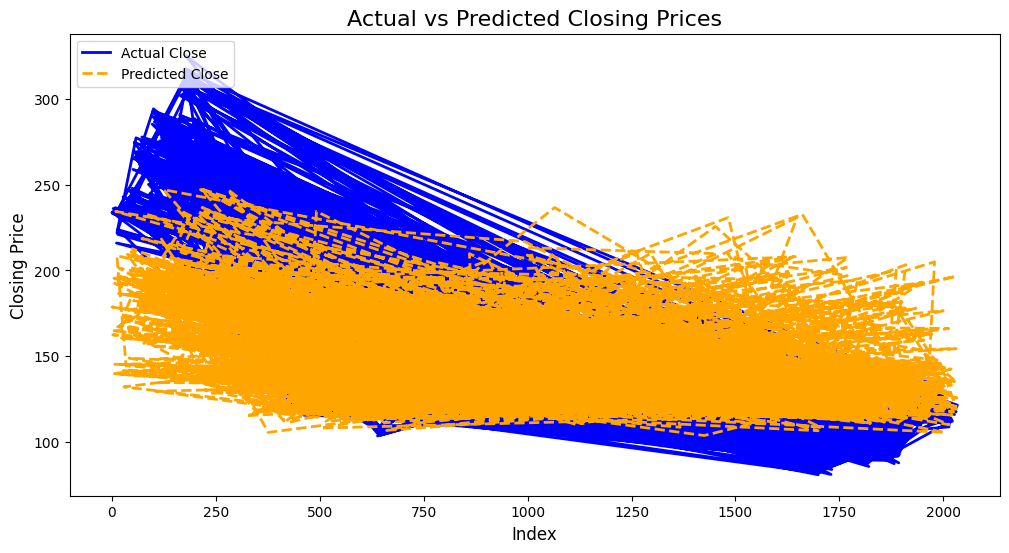

In [60]:
import matplotlib.pyplot as plt

# Plot the actual and predicted closing prices
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the actual closing prices
plt.plot(valid['Actual Close'], label='Actual Close', color='blue', linestyle='-', linewidth=2)

# Plot the predicted closing prices
plt.plot(valid['Predicted Close'], label='Predicted Close', color='orange', linestyle='--', linewidth=2)

# Add labels, title, and legend for better understanding
plt.title("Actual vs Predicted Closing Prices", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.legend(loc="upper left", fontsize=10)

# Display the chart
plt.show()

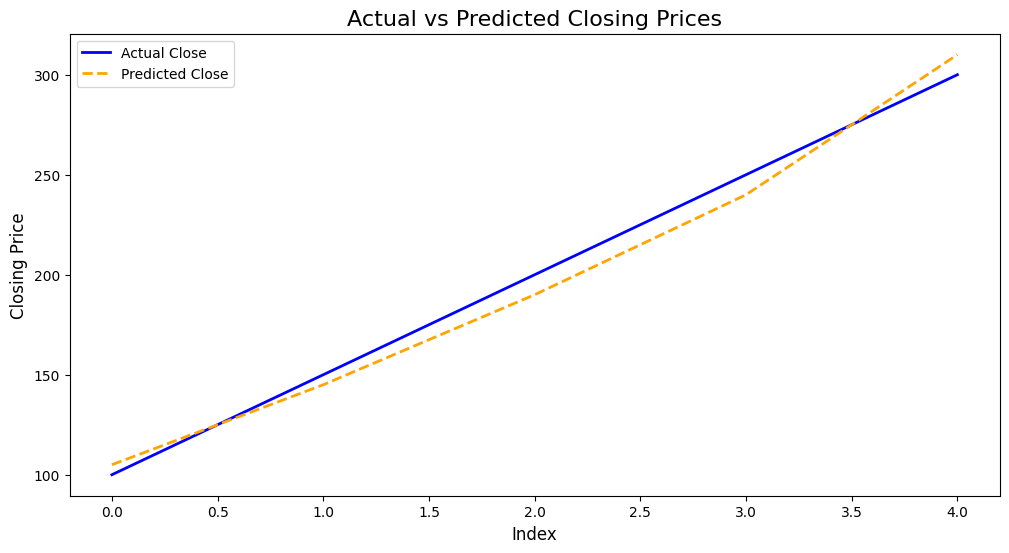

In [61]:
import matplotlib.pyplot as plt

# Create a sample valid DataFrame to simulate the scenario
import pandas as pd

# Simulated data for actual and predicted closing prices
valid = pd.DataFrame({
    'Actual Close': [100, 150, 200, 250, 300],
    'Predicted Close': [105, 145, 190, 240, 310]
})

# Plot the actual and predicted closing prices using a line chart
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the actual closing prices
plt.plot(valid['Actual Close'], label='Actual Close', color='blue', linestyle='-', linewidth=2)

# Plot the predicted closing prices
plt.plot(valid['Predicted Close'], label='Predicted Close', color='orange', linestyle='--', linewidth=2)

# Add labels, title, and legend for better understanding
plt.title("Actual vs Predicted Closing Prices", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.legend(loc="upper left", fontsize=10)

# Display the chart
plt.show()